<a href="https://colab.research.google.com/github/sanjayparajuli/colab/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X,y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X.shape


(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

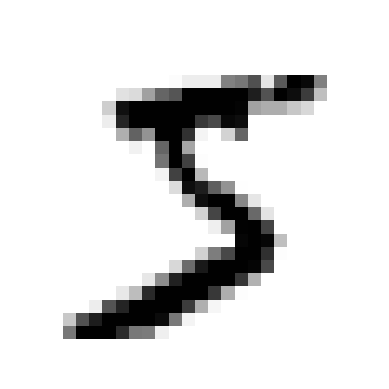

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
some_digit = X[0]
plot_digit(some_digit)
plt.show()

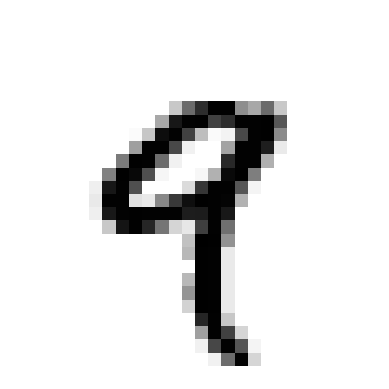

In [8]:
def visualize_digit(digits):
  image = digits.reshape(28, 28)
  plt.imshow(image, cmap='binary')

new_test = X[4]
plot_digit(new_test)
plt.show()


In [9]:
y[4]

'9'

In [10]:
y[0]

'5'

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
X_train.shape

(60000, 784)

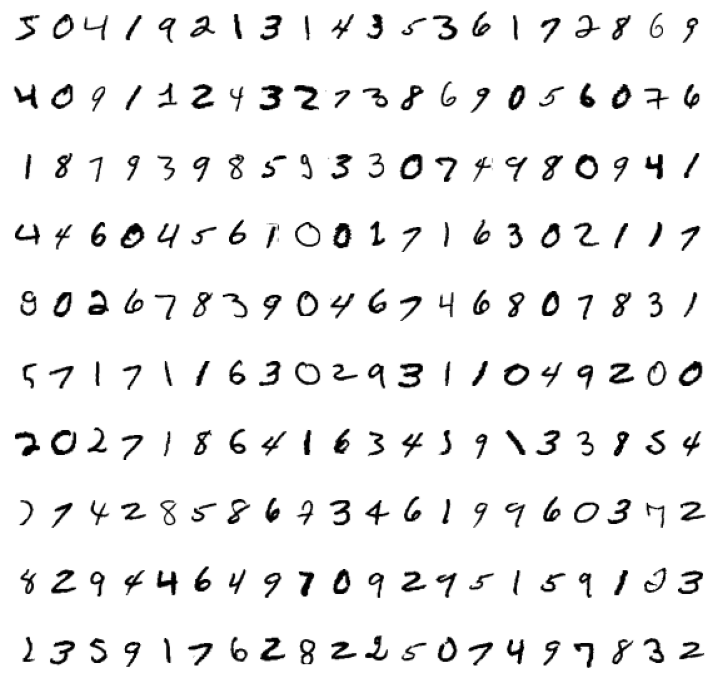

In [13]:
plt.figure(figsize=(9,9))
for idx, image_data in enumerate(X[:200]):
  plt.subplot(10, 20, idx+1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.show()

In [14]:
y_train_9 =(y_train == '9')
y_test_9 = (y_test == '9')

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([new_test])

array([ True])

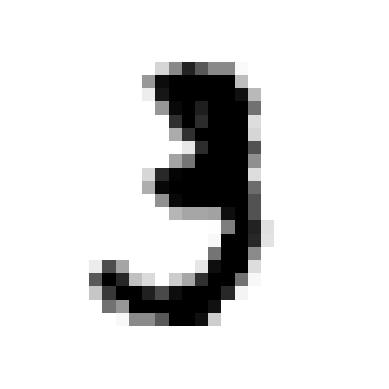

In [17]:
def mnist_visualize(data):
  image = data.reshap(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
num = X[10]
plot_digit(num)
plt.show()

In [18]:
from sklearn.model_selection import  cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.9456 , 0.95195, 0.9509 ])

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_9):
  clone_clf = clone(sgd_clf)
  X_train_folds
